In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("bank_train.csv")
df_clean = df.copy()

Mapeando os dados necessários

In [93]:
df_clean['y'] = df['y'].replace({"yes": 1, "no": 0})
df_clean['loan'] = df['loan'].replace({'no': 0, 'n': 0, 'y':1, 'yes':1})
df_clean['default'] = df['default'].replace({'no': 0, 'yes':1})
df_clean['housing'] = df['housing'].replace({'no': 0, 'yes':1})

In [94]:
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Aplicar o mapeamento à coluna 'month'
df_clean['month'] = df['month'].map(month_mapping)

In [95]:
education_mapping = {
    'primary': 1, 'secondary': 2, 'tertiary': 3
}

# Aplicar o mapeamento à coluna 'month'
df_clean['education'] = df['education'].map(education_mapping)

In [96]:
df_clean = df_clean[df_clean['job'] != 'unknown']
df_clean = df_clean[df_clean['education'] != 'unknown']
df_clean = df_clean.dropna(subset=['marital'])
df_clean = df_clean.dropna(subset=['job'])
df_clean = df_clean.dropna(subset=['contact'])

Limpando colunas


In [15]:
df_clean = df_clean.drop(columns=['location'])
df_clean = df_clean.drop(columns=['poutcome'])
df_clean = df_clean.drop(columns=['id'])

Remoção de outliers


In [18]:
df_clean= df_clean[(df_clean['balance'] < 15000) & (df_clean['balance'] > -5000) ]
df_clean = df_clean[(df_clean['age'] <= 80) & (df_clean['age'] > 8)]
df_clean['job'], uniques = pd.factorize(df_clean['job'])
df_clean['marital'], uniques2 = pd.factorize(df_clean['marital'])

In [27]:
df_clean.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,41.0,0,0,3.0,0,4522.0,0,0,0,28,8,55,1.0,-1,0.0,0
1,42.0,1,1,1.0,1,398.0,1,0,1,16,5,251,4.0,-1,0.0,0
2,26.0,2,0,2.0,0,706.0,0,0,1,8,10,118,1.0,105,2.0,0
3,54.0,0,1,3.0,0,0.0,0,1,0,19,11,307,3.0,-1,0.0,0
4,43.0,3,1,2.0,0,918.0,1,0,1,6,5,193,1.0,-1,0.0,0


In [25]:
df_clean.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [24]:

df_clean = df_clean.dropna(subset=['education'])
df_clean = df_clean.dropna(subset=['previous'])
df_clean = df_clean.dropna(subset=['campaign'])


In [31]:
df_clean['contact'], contact_uniques = pd.factorize(df_clean['contact'])

In [28]:
df_clean.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,41.0,0,0,3.0,0,4522.0,0,0,0,28,8,55,1.0,-1,0.0,0
1,42.0,1,1,1.0,1,398.0,1,0,1,16,5,251,4.0,-1,0.0,0
2,26.0,2,0,2.0,0,706.0,0,0,1,8,10,118,1.0,105,2.0,0
3,54.0,0,1,3.0,0,0.0,0,1,0,19,11,307,3.0,-1,0.0,0
4,43.0,3,1,2.0,0,918.0,1,0,1,6,5,193,1.0,-1,0.0,0


Preenchendo colunas faltantes de 'contact' via modelo


In [35]:
known = df_clean[df_clean['contact'].isin([0, 2])] #0 é celular, 2 é telefone
unknow = df_clean[df_clean['contact'].isin([1])] #1 é desconhecido

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [83]:
# Dividir os dados em conjuntos de treino e teste

from sklearn.model_selection import train_test_split

X = known.drop(columns=['contact']) #dados sem contato, ou seja, sem o target
y = known['contact'] #target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
from sklearn.neighbors import KNeighborsClassifier

modelKNN = KNeighborsClassifier(n_neighbors = 5)
modelKNN.fit(X_train, y_train)

KNeighborsClassifier()

In [70]:
y_pred = modelKNN.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.9111747851002865


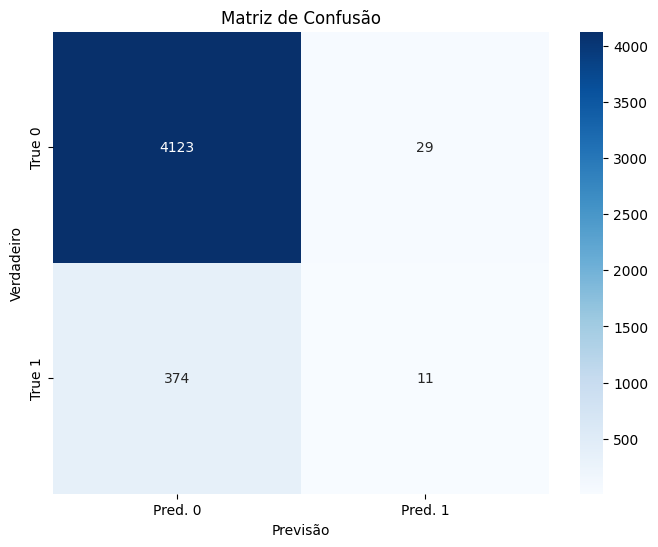

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred. 0', 'Pred. 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

In [75]:
contact_counts = df_clean['contact'].value_counts()
print(contact_counts)

contact
0    20771
1     9065
2     1910
Name: count, dtype: int64


In [81]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

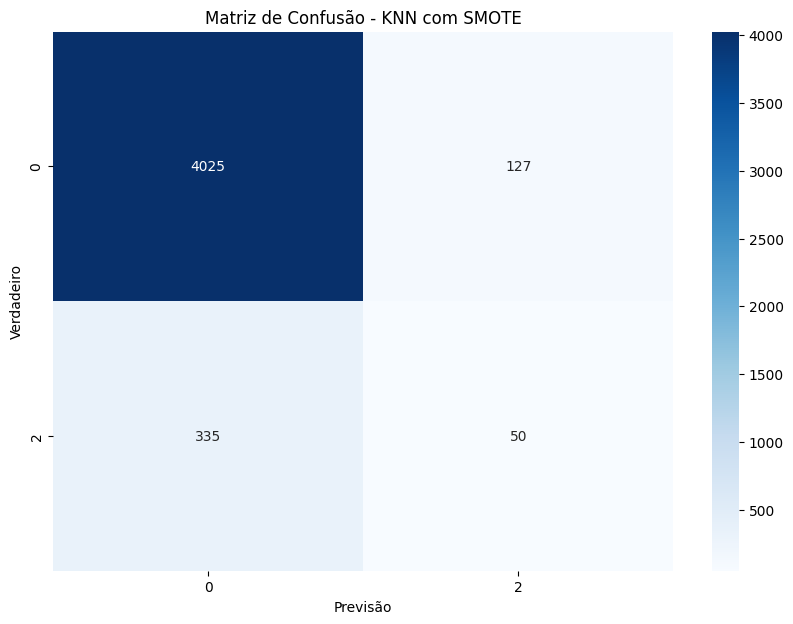

In [100]:
modelRFC = RandomForestClassifier()
modelRFC.fit(X_train_res, y_train_res)

# Fazer previsões
y_pred = modelRFC.predict(X_test)

# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=modelRFC.classes_, yticklabels=modelRFC.classes_)
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - KNN com SMOTE')
plt.show()

In [ ]:
y_pred = modelKNN.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Oversampling


In [98]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
# Crie o objeto SMOTE
smote = SMOTE(random_state=42)

# Aplique o SMOTE para o conjunto de treinamento
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Exiba os resultados
print("Antes do SMOTE:")
print(y_train.value_counts())
print("TESTE Antes do SMOTE:")
print(pd.Series(y_test).value_counts())


print("\nDepois do SMOTE:")
print(pd.Series(y_resampled).value_counts())

Antes do SMOTE:
contact
0    16619
2     1525
Name: count, dtype: int64
TESTE Antes do SMOTE:
contact
0    4152
2     385
Name: count, dtype: int64

Depois do SMOTE:
contact
0    16619
2    16619
Name: count, dtype: int64


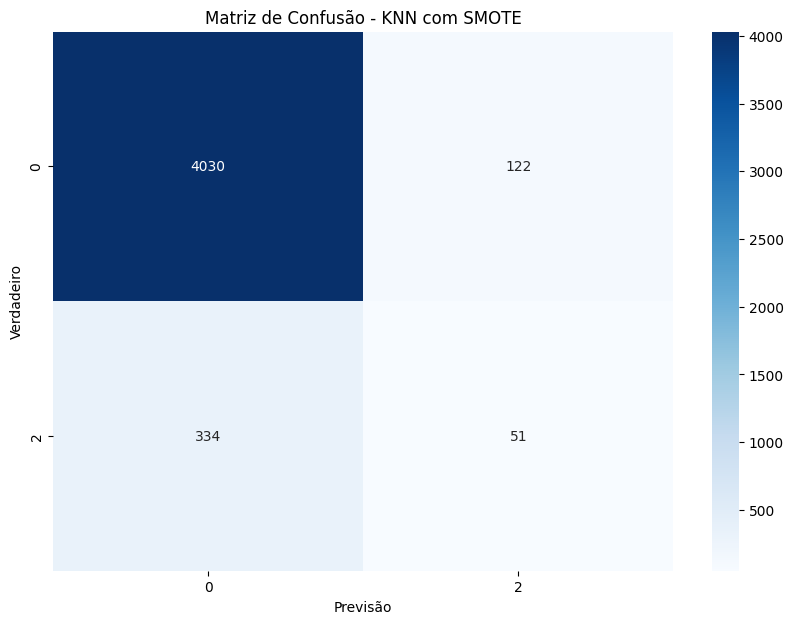

In [99]:
model = RandomForestClassifier()
model.fit(X_resampled, y_resampled)

# Fazer previsões
y_pred = model.predict(X_test)

# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - KNN com SMOTE')
plt.show()

Undersampling

Matriz de Confusão:
[[2602 1550]
 [ 157  228]]


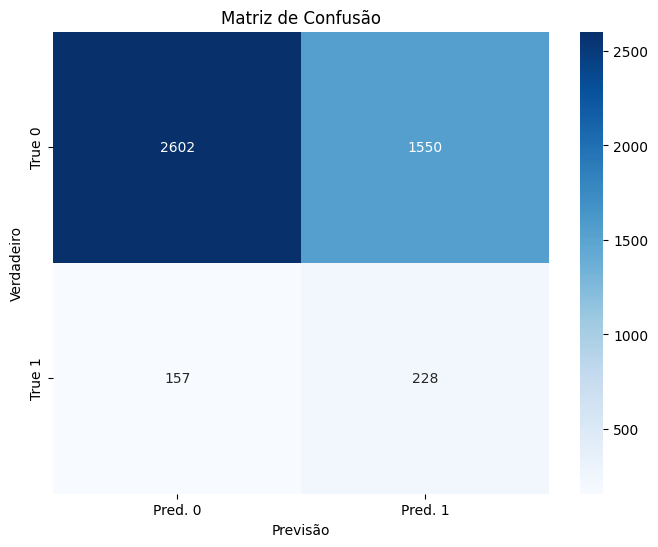

In [97]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
# Crie o objeto RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)

# Aplique o undersampling para o conjunto de treinamento
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)

# Treine um modelo de regressão logística com os dados subamostrados
model = LogisticRegression(random_state=42)
model.fit(X_resampled, y_resampled)

# Faça previsões no conjunto de teste
y_pred = model.predict(X_test)

# Crie a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exiba a matriz de confusão
print("Matriz de Confusão:")
print(cm)

# Plotar a matriz de confusão usando seaborn para uma visualização melhor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred. 0', 'Pred. 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()